# **Linear regression implementation using numpy**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression as SK_LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler 

from Scalers import MinMaxStandardizer, RobustStandardizer, NormalStandardizer, NoneStandardizer

## Data preparation using Pandas

In [2]:
data = pd.read_csv('./car_dataset/car data.csv')
# I hate underscores
data.columns = data.columns.map(
    lambda x: ' '.join(x.split('_'))
    )
data.head(2)

,Car Name,Year,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [3]:
# Encoding Categorical Data
data = data.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2}})
data = data.replace({'Seller Type':{'Dealer':0,'Individual':1}})
data = data.replace({'Transmission':{'Manual':0,'Automatic':1}})

C:\Users\Henti\AppData\Local\Temp\ipykernel_28804\2343027753.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2}})
C:\Users\Henti\AppData\Local\Temp\ipykernel_28804\2343027753.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Seller Type':{'Dealer':0,'Individual':1}})
C:\Users\Henti\AppData\Local\Temp\ipykernel_28804\2343027753.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

In [4]:
data = data.drop('Car Name', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling Price  301 non-null    float64
 2   Present Price  301 non-null    float64
 3   Kms Driven     301 non-null    int64  
 4   Fuel Type      301 non-null    int64  
 5   Seller Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


### Mb I should remove these outliers?:

In [5]:
data.describe()

,Year,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [28]:
data.describe()['Present Price'][-3:]

50%     6.4
75%     9.9
max    92.6
Name: Present Price, dtype: float64

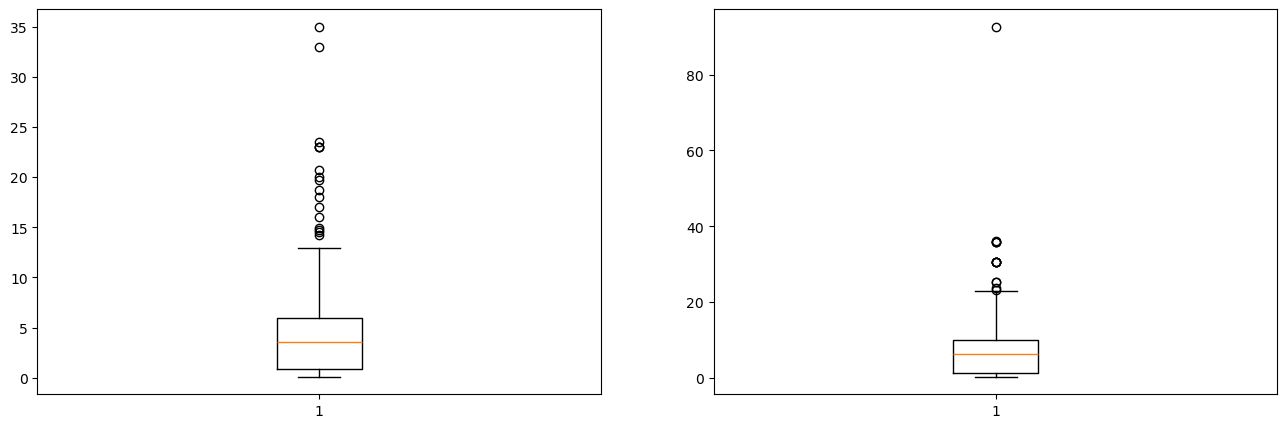

In [8]:
fig, (ax_selling, ax_present) = plt.subplots(1, 2, figsize=(16, 5))
ax_selling.boxplot(data['Selling Price'])
ax_present.boxplot(data['Present Price'])
plt.show()

## Estimation using sk-learn LinearRegression class

In [9]:
X = data.drop(['Selling Price'], axis=1)
Y = data['Selling Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

In [10]:
X_train.shape, X_test.shape

((210, 7), (91, 7))

### Scores using 'Present Price' feature only:
 - Train score: 0.7912190751012238
 - Test score: 0.6873518619001651


In [11]:
model = SK_LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(f"Train score: {r2_score(Y_train, model.predict(X_train))}")
print(f"Test score: {r2_score(Y_test, Y_pred)}")

Train score: 0.8852256166439524
Test score: 0.8532136825387552


## Linear Regression (n-dimensional) implementation

In [41]:
class LinearRegression():

    def __init__(self, X: np.array, Y: np.array, standardizer=NormalStandardizer) -> None:
        # n - sample size, m - number of features
        self.n, self.m = X.shape 
        self.reset_weights()

        self.standardizer = standardizer(X=X, Y=Y)
        self.X, self.Y = self.standardizer['X'], self.standardizer['Y']
        
    def reset_weights(self) -> None:
        
        self.W = np.zeros((self.m, 1))
        self.b = 0
        self.err_history = []

    def predict(self, X: np.array, norm_input=True, denorm_output=True) -> np.array:

        if norm_input:
            X = self.standardizer.normalize(X, 'X')
        
        y_hat = X @ self.W + self.b
        
        if denorm_output:
            y_hat = self.standardizer.denormalize(y_hat, 'Y') 
        
        return y_hat

    def train(self, alpha=0.01, epochs=10, minimum=0.01):
        
        self.reset_weights()

        for epoch in range(epochs):
            Y_hat = self.X@self.W + self.b
            
            gradient = alpha * self.X.T @ (self.Y-Y_hat) * (-1)
            self.W -= gradient
            self.b -= alpha * (-1) * (self.Y-Y_hat).mean()

            MSE_error = (0.5*(self.Y - Y_hat)**2).mean()
            self.err_history.append(MSE_error)

            if MSE_error <= minimum:
                print(f"Minimim break on {epoch}")
                break

In [42]:
LR = LinearRegression(X_train.to_numpy(), Y_train.to_numpy()[..., np.newaxis], standardizer=RobustStandardizer)
LR.X.shape, LR.Y.shape

d:\Python_Work\ML_implementation\Scalers.py:102: RuntimeWarning: divide by zero encountered in divide
  self.data[key] = (value - data_median) / (data_q3 - data_q1)
d:\Python_Work\ML_implementation\Scalers.py:102: RuntimeWarning: invalid value encountered in divide
  self.data[key] = (value - data_median) / (data_q3 - data_q1)


((210, 7), (210, 1))

In [43]:
LR.standardizer._params

{'X': {'q1': array([2.012e+03, 1.470e+00, 1.500e+04, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00]),
  'median': array([2.0140e+03, 6.7750e+00, 3.1427e+04, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00]),
  'q3': array([2.0160e+03, 9.9875e+00, 5.0000e+04, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00])},
 'Y': {'q1': array([1.05]), 'median': array([3.925]), 'q3': array([6.1375])}}

In [39]:
LR.train(alpha=0.001, epochs=50, minimum=0.001)

C:\Users\Henti\AppData\Local\Temp\ipykernel_28804\2423560007.py:34: RuntimeWarning: invalid value encountered in matmul
  Y_hat = self.X@self.W + self.b


d:\Python_Work\ML_implementation\Scalers.py:105: RuntimeWarning: divide by zero encountered in divide
  return (data - self._params[key]["median"]) / ( self._params[key]["q3"] - self._params[key]["q1"] )
d:\Python_Work\ML_implementation\Scalers.py:105: RuntimeWarning: invalid value encountered in divide
  return (data - self._params[key]["median"]) / ( self._params[key]["q3"] - self._params[key]["q1"] )


ValueError: Input contains NaN.

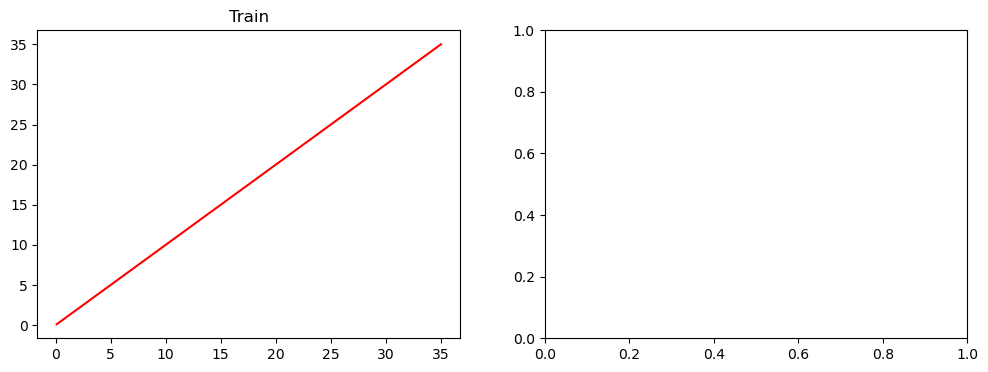

In [40]:
fig, axis = plt.subplots(1, 2, figsize=(12, 4))

for ax, (x_true, y_true), title in zip(axis, [(X_train, Y_train), (X_test, Y_test)], ('Train', 'Test')):
    x_true, y_true = x_true.to_numpy(), y_true.to_numpy()
    y_hat = LR.predict(x_true).flatten() 
    ax.scatter(y_true, y_hat, s=5)
    # x=y line plot 
    ax.plot((y_true.min(), y_true.max()), (y_true.min(), y_true.max()), c='red')
    ax.set_title(title)
    print(f"{title} score: {r2_score( y_true, y_hat)}")

plt.show()

[0.5, 0.25011253538246486, 0.15241872532155945, 0.11153510722372044, 0.09260572323609431, 0.0826357703874829, 0.07663305146242602, 0.07259042043804587, 0.06964479520726564, 0.06738933356948155, 0.06560985421560855, 0.06418013178129751, 0.06301814742016615, 0.06206652370453407, 0.06128300676353818, 0.060635384531256206, 0.060098516339759066, 0.05965245527058368, 0.05928118536692561, 0.058971731650955324, 0.058713510513969044, 0.05849784275330665, 0.058317580866991375, 0.05816681902398567, 0.05804066431094327, 0.05793505431083821, 0.057846610309581895, 0.057772518295305546, 0.05771043190367626, 0.0576583928715376, 0.05761476557926451, 0.05757818301151582, 0.05754750202699102, 0.05752176625434515, 0.05750017526043062, 0.05748205889406218, 0.05746685591155014, 0.05745409615219921, 0.057443385662214685, 0.057434394270922035, 0.05742684520910111, 0.05742050642952521, 0.05741518334754161, 0.05741071276712336, 0.05740695779715224, 0.057403803595265895, 0.05740115380362562, 0.057398927563415574

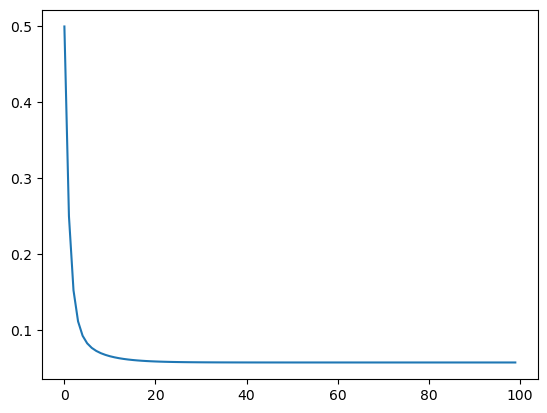

In [16]:
print(LR.err_history)
plt.plot( LR.err_history )
plt.show()

In [23]:
X_1d = [1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78]
y_1d = [29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5]

X_1d = np.array(X_1d).reshape(len(X_1d), 1)
y_1d = np.array(y_1d).reshape(len(y_1d), 1)
X_1d.shape, y_1d.shape

((41, 1), (41, 1))

In [24]:
LR_1d = LinearRegression(X_1d, y_1d)
LR_1d.train(alpha=0.01, epochs=10, minimum=0.001)

[[0.97532465]] 2.0969675860237097e-16


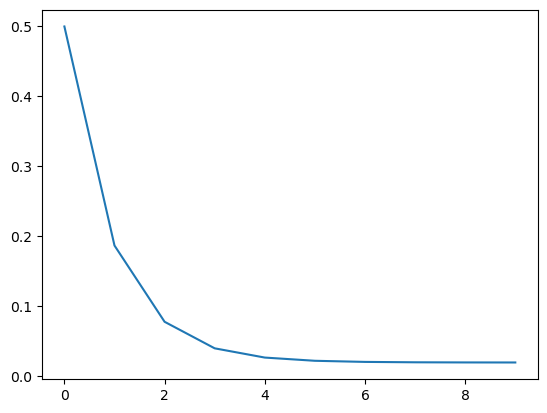

In [25]:
print(LR_1d.W, LR_1d.b)
plt.plot( LR_1d.err_history )
plt.show()

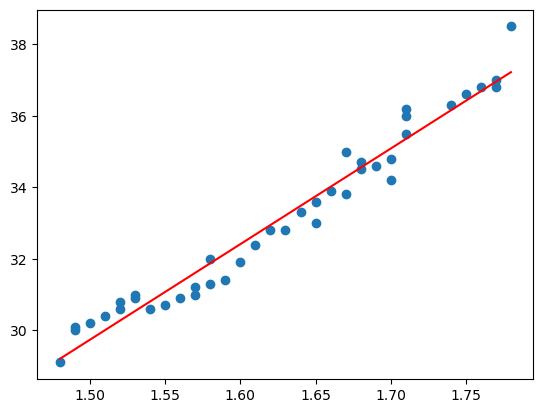

In [26]:
plt.scatter(X_1d, y_1d)
plt.plot( X_1d, LR_1d.predict(X_1d), c='red' )

# Tesing results, Comparing to the Sk-learn implementation:

In [2]:
X = [1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78]
y = [29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5]

X = np.array(X)
y = np.array(y)

In [ ]:
# импортируем библиотеку Numpy
import numpy as np

# преобразуем наш список X сначала в одномерный массив Numpy, а затем добавим второе измерение
X = np.array(X).reshape(-1, 1)

# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)

In [ ]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
# т.е. найдем те самые веса или наклон и сдвиг прямой с помощью функции потерь
model.fit(X, y)

LinearRegression()

In [ ]:
# выведем наклон и сдвиг с помощью атрибутов coef_ и intercept_ соответственно
print(model.coef_, model.intercept_)

[26.86181201] -10.570936299787334


Новое уравнение, найдено с помощью библиотеки Scikit-learn:

$$ y = 26.86x - 10.57 $$

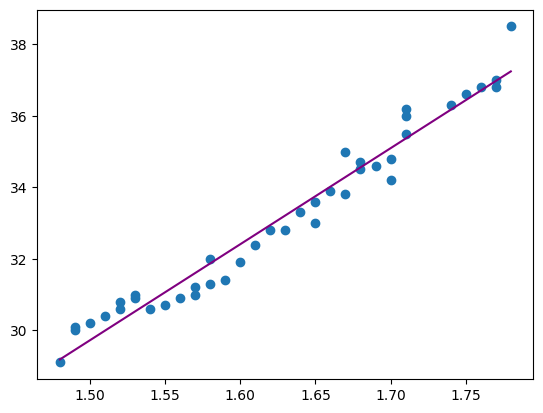

In [ ]:
y_sklearn = lambda x: model.coef_*x + model.intercept_
plt.scatter(X, y)
plt.plot( X, y_sklearn(X), c='purple' )

In [ ]:
# на основе значений роста (Х) предскажем значения обхвата шеи
y_pred = model.predict(X)

# выведем первые пять значений, с помощью диапазоне индексов
print(y_pred[:5])

[29.18454547 29.45316359 29.45316359 29.72178171 29.99039983]


In [ ]:
# импортируем модуль метрик, то есть измерений качества моделей
from sklearn import metrics
# выведем ту самую среднюю сумму расстояний или, говоря более корректно,
# среднеквадратическую ошибку
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))

Mean Squared Error (MSE): 0.00257287870832655


In [ ]:
# избавимся от квадрата в вычислениях, возьмем квадратный корень из нашей метрики
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Root Mean Squared Error (RMSE): 0.05072355181103301


In [ ]:
# сравним RMSE со средним обхватом шеи: модель неплохо обучилась!!!
y.mean()

0.42579138557343005